In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gdown
import os
import yaml
import sys
from os.path import abspath, dirname, join
current_dir = os.getcwd()
print(current_dir)
sys.path.insert(0, "/home/yif/Documents/KTH/git/diffusion_policy_escape_energy")

from core.controllers.quadrotor_diffusion_policy import build_networks_from_config
from core.dataset.ee2d_dataset import EscapeEnergy2DDataset
from core.trainers.quadrotor_diffusion_policy_trainer import PlanarQuadrotorDiffusionPolicyTrainer

/home/yif/Documents/KTH/git/diffusion_policy_escape_energy/train


/home/yif/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load config

In [3]:
with open("../config/config_ee2d.yaml", "r") as file:
    config = yaml.safe_load(file)

## Download dataset

In [4]:
dataset_path = "../dataset_escape_from_u_2d_30000_envs.joblib"
# if not os.path.isfile(dataset_path):
#     gdown.download(id="14safYt34YKn21vL9c_BsRHaG_URPB4Dp", output=dataset_path, quiet=False)

## Load dataset and instantiate the NN

In [5]:
num_data = 2048
dataset = EscapeEnergy2DDataset(dataset_path=dataset_path, config=config, num_data=num_data)
print("Dataset loaded successfully.")

net = build_networks_from_config(config)
print("Networks initialized successfully.")

!!!!!! dataset_root dict_keys(['costs', 'paths', 'object_starts', 'ellipse_centers', 'ellipse_radii'])
!!!!!! paths (29868, 20, 2)
!!!!!! object_starts (29868, 2)
!!!!!! ellipse_radii (29868, 3, 2)
!!!!!! ellipse_centers (29868, 3, 2)
----------------------
!!!!!! action (40960, 2)
!!!!!! obs (40960, 2)
!!!!!! obstacle (40960, 12)
----------------------
Dataset loaded successfully.
Networks initialized successfully.


In [ ]:
dataset.__getitem__(0)

{'action': array([[ 0.3499149 , -0.07250604],
        [ 0.3499149 , -0.07250604],
        [ 0.3499149 , -0.07250604],
        [ 0.3499149 , -0.07250604],
        [ 0.40801454, -0.15726896],
        [ 0.44776934, -0.04675347],
        [ 0.3963071 , -0.01808464],
        [ 0.40379595,  0.02797985],
        [ 0.47788737,  0.04764918],
        [ 0.54595682,  0.05196685],
        [ 0.60694543,  0.10499713],
        [ 0.67810765,  0.05802508],
        [ 0.70343048, -0.04855155],
        [ 0.72672735, -0.15638672],
        [ 0.8071465 , -0.11586022],
        [ 0.75484096, -0.13050522]]),
 'obs': array([0.35252108, 0.05554417, 0.35252108, 0.05554417, 0.35252108,
        0.05554417, 0.35252108, 0.05554417, 0.17445749, 0.48484993,
        0.08561694, 0.23540013, 0.5       , 0.4259499 , 0.31514904,
        0.06064222, 0.81143872, 0.42356159, 0.05606006, 0.18463881]),
 'obstacle': array([[0.17445749, 0.48484993, 0.08561694, 0.23540013, 0.5       ,
         0.4259499 , 0.31514904, 0.06064222, 0.811

## Instantiate the trainer

In [7]:
import torch
torch.cuda.is_available() # TODO

True

In [8]:
trainer = PlanarQuadrotorDiffusionPolicyTrainer(
    net=net,
    dataset=dataset,
    config=config,
)

Using device: cuda
!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


## Start training

In [9]:
num_epochs = 100
trainer.train(num_epochs, save_ckpt_epoch=10)
trainer.save_checkpoint(f"ckpt_final_{num_epochs}_epochs.ckpt")

!!!!!! len(self.indices) 47104


Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   1%|          | 1/100 [00:18<30:16, 18.35s/it, loss=0.384]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   2%|▏         | 2/100 [00:36<29:29, 18.06s/it, loss=0.0833]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   3%|▎         | 3/100 [00:54<29:08, 18.03s/it, loss=0.0722]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   4%|▍         | 4/100 [01:12<28:54, 18.06s/it, loss=0.0636]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   5%|▌         | 5/100 [01:30<28:41, 18.12s/it, loss=0.0605]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   6%|▌         | 6/100 [01:48<28:31, 18.21s/it, loss=0.0575]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   7%|▋         | 7/100 [02:07<28:20, 18.29s/it, loss=0.0566]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   8%|▊         | 8/100 [02:26<28:13, 18.40s/it, loss=0.0539]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   9%|▉         | 9/100 [02:44<28:04, 18.51s/it, loss=0.0537]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:   9%|▉         | 9/100 [03:03<28:04, 18.51s/it, loss=0.0522]

!!!!!! len(self.indices) 47104


Epoch:  10%|█         | 10/100 [03:03<28:01, 18.68s/it, loss=0.0522]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  11%|█         | 11/100 [03:23<28:10, 18.99s/it, loss=0.0523]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  12%|█▏        | 12/100 [03:44<28:41, 19.56s/it, loss=0.052] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  13%|█▎        | 13/100 [04:06<29:18, 20.21s/it, loss=0.0507]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  14%|█▍        | 14/100 [04:29<30:22, 21.19s/it, loss=0.0498]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  15%|█▌        | 15/100 [04:52<30:46, 21.72s/it, loss=0.0491]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  16%|█▌        | 16/100 [05:15<31:01, 22.17s/it, loss=0.0474]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  17%|█▋        | 17/100 [05:39<31:28, 22.75s/it, loss=0.0476]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  18%|█▊        | 18/100 [06:04<31:52, 23.32s/it, loss=0.0471]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  19%|█▉        | 19/100 [06:28<31:38, 23.44s/it, loss=0.047] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  19%|█▉        | 19/100 [06:53<31:38, 23.44s/it, loss=0.0468]

!!!!!! len(self.indices) 47104


Epoch:  20%|██        | 20/100 [06:54<32:17, 24.22s/it, loss=0.0468]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  21%|██        | 21/100 [07:19<32:10, 24.44s/it, loss=0.0466]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  22%|██▏       | 22/100 [07:43<31:47, 24.45s/it, loss=0.0467]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  23%|██▎       | 23/100 [08:08<31:24, 24.47s/it, loss=0.0454]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  24%|██▍       | 24/100 [08:32<30:59, 24.47s/it, loss=0.0458]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  25%|██▌       | 25/100 [08:58<31:00, 24.81s/it, loss=0.0461]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  26%|██▌       | 26/100 [09:24<31:16, 25.36s/it, loss=0.0442]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  27%|██▋       | 27/100 [09:51<31:19, 25.75s/it, loss=0.0436]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  28%|██▊       | 28/100 [10:16<30:42, 25.58s/it, loss=0.0443]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  29%|██▉       | 29/100 [10:41<30:05, 25.42s/it, loss=0.0443]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  29%|██▉       | 29/100 [11:06<30:05, 25.42s/it, loss=0.0439]

!!!!!! len(self.indices) 47104


Epoch:  30%|███       | 30/100 [11:07<29:36, 25.37s/it, loss=0.0439]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  31%|███       | 31/100 [11:32<29:16, 25.46s/it, loss=0.0444]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  32%|███▏      | 32/100 [11:59<29:16, 25.83s/it, loss=0.0424]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  33%|███▎      | 33/100 [12:26<29:07, 26.08s/it, loss=0.0437]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  34%|███▍      | 34/100 [12:52<28:53, 26.27s/it, loss=0.0429]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  35%|███▌      | 35/100 [13:19<28:35, 26.40s/it, loss=0.0435]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  36%|███▌      | 36/100 [13:46<28:16, 26.50s/it, loss=0.0427]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  37%|███▋      | 37/100 [14:12<27:53, 26.57s/it, loss=0.0412]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  38%|███▊      | 38/100 [14:39<27:30, 26.62s/it, loss=0.0418]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  39%|███▉      | 39/100 [15:06<27:04, 26.64s/it, loss=0.0414]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  39%|███▉      | 39/100 [15:33<27:04, 26.64s/it, loss=0.0416]

!!!!!! len(self.indices) 47104


Epoch:  40%|████      | 40/100 [15:33<26:42, 26.72s/it, loss=0.0416]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  41%|████      | 41/100 [15:59<26:14, 26.69s/it, loss=0.0409]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  42%|████▏     | 42/100 [16:26<25:47, 26.69s/it, loss=0.0425]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  43%|████▎     | 43/100 [16:53<25:20, 26.68s/it, loss=0.0416]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  44%|████▍     | 44/100 [17:19<24:53, 26.67s/it, loss=0.0408]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  45%|████▌     | 45/100 [17:46<24:26, 26.67s/it, loss=0.0409]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  46%|████▌     | 46/100 [18:13<23:59, 26.66s/it, loss=0.0413]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  47%|████▋     | 47/100 [18:39<23:33, 26.66s/it, loss=0.0397]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  48%|████▊     | 48/100 [19:06<23:06, 26.67s/it, loss=0.0397]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  49%|████▉     | 49/100 [19:33<22:44, 26.75s/it, loss=0.0404]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  49%|████▉     | 49/100 [20:00<22:44, 26.75s/it, loss=0.0397]

!!!!!! len(self.indices) 47104


Epoch:  50%|█████     | 50/100 [20:00<22:24, 26.89s/it, loss=0.0397]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  51%|█████     | 51/100 [20:27<21:59, 26.93s/it, loss=0.04]  

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  52%|█████▏    | 52/100 [20:54<21:34, 26.96s/it, loss=0.0395]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  53%|█████▎    | 53/100 [21:21<21:07, 26.97s/it, loss=0.0393]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  54%|█████▍    | 54/100 [21:48<20:40, 26.97s/it, loss=0.0393]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  55%|█████▌    | 55/100 [22:15<20:12, 26.95s/it, loss=0.0401]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  56%|█████▌    | 56/100 [22:42<19:46, 26.96s/it, loss=0.0382]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  57%|█████▋    | 57/100 [23:09<19:19, 26.97s/it, loss=0.0386]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  58%|█████▊    | 58/100 [23:36<18:53, 26.98s/it, loss=0.038] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  59%|█████▉    | 59/100 [24:03<18:30, 27.09s/it, loss=0.0386]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  59%|█████▉    | 59/100 [24:31<18:30, 27.09s/it, loss=0.0368]

!!!!!! len(self.indices) 47104


Epoch:  60%|██████    | 60/100 [24:31<18:07, 27.19s/it, loss=0.0368]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  61%|██████    | 61/100 [24:58<17:38, 27.15s/it, loss=0.0381]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  62%|██████▏   | 62/100 [25:25<17:10, 27.12s/it, loss=0.0384]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  63%|██████▎   | 63/100 [25:52<16:42, 27.09s/it, loss=0.0375]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  64%|██████▍   | 64/100 [26:19<16:14, 27.07s/it, loss=0.0369]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  65%|██████▌   | 65/100 [26:46<15:46, 27.05s/it, loss=0.0371]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  66%|██████▌   | 66/100 [27:13<15:19, 27.05s/it, loss=0.0373]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  67%|██████▋   | 67/100 [27:40<14:52, 27.03s/it, loss=0.0372]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  68%|██████▊   | 68/100 [28:07<14:24, 27.02s/it, loss=0.0373]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  69%|██████▉   | 69/100 [28:34<13:58, 27.04s/it, loss=0.0361]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  69%|██████▉   | 69/100 [29:01<13:58, 27.04s/it, loss=0.0359]

!!!!!! len(self.indices) 47104


Epoch:  70%|███████   | 70/100 [29:01<13:33, 27.12s/it, loss=0.0359]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  71%|███████   | 71/100 [29:28<13:05, 27.08s/it, loss=0.0362]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  72%|███████▏  | 72/100 [29:56<12:38, 27.09s/it, loss=0.036] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  73%|███████▎  | 73/100 [30:23<12:12, 27.12s/it, loss=0.0359]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  74%|███████▍  | 74/100 [30:50<11:45, 27.12s/it, loss=0.0357]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  75%|███████▌  | 75/100 [31:17<11:17, 27.09s/it, loss=0.0359]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  76%|███████▌  | 76/100 [31:44<10:49, 27.07s/it, loss=0.035] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  77%|███████▋  | 77/100 [32:11<10:23, 27.12s/it, loss=0.0351]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  78%|███████▊  | 78/100 [32:38<09:57, 27.14s/it, loss=0.0348]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  79%|███████▉  | 79/100 [33:06<09:31, 27.23s/it, loss=0.0353]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  79%|███████▉  | 79/100 [33:33<09:31, 27.23s/it, loss=0.0354]

!!!!!! len(self.indices) 47104


Epoch:  80%|████████  | 80/100 [33:33<09:05, 27.30s/it, loss=0.0354]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  81%|████████  | 81/100 [34:00<08:37, 27.25s/it, loss=0.0351]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  82%|████████▏ | 82/100 [34:28<08:10, 27.28s/it, loss=0.0345]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  83%|████████▎ | 83/100 [34:55<07:43, 27.25s/it, loss=0.0338]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  84%|████████▍ | 84/100 [35:22<07:15, 27.21s/it, loss=0.0343]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  85%|████████▌ | 85/100 [35:49<06:47, 27.20s/it, loss=0.035] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  86%|████████▌ | 86/100 [36:16<06:20, 27.17s/it, loss=0.0337]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  87%|████████▋ | 87/100 [36:43<05:52, 27.15s/it, loss=0.0342]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  88%|████████▊ | 88/100 [37:10<05:25, 27.12s/it, loss=0.0347]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  89%|████████▉ | 89/100 [37:37<04:58, 27.09s/it, loss=0.0327]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  89%|████████▉ | 89/100 [38:04<04:58, 27.09s/it, loss=0.0338]

!!!!!! len(self.indices) 47104


Epoch:  90%|█████████ | 90/100 [38:05<04:31, 27.14s/it, loss=0.0338]

!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  91%|█████████ | 91/100 [38:32<04:03, 27.10s/it, loss=0.0346]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  92%|█████████▏| 92/100 [38:59<03:36, 27.09s/it, loss=0.0342]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  93%|█████████▎| 93/100 [39:26<03:09, 27.11s/it, loss=0.0341]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  94%|█████████▍| 94/100 [39:53<02:42, 27.10s/it, loss=0.0335]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  95%|█████████▌| 95/100 [40:20<02:15, 27.10s/it, loss=0.0338]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  96%|█████████▌| 96/100 [40:47<01:48, 27.09s/it, loss=0.0336]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  97%|█████████▋| 97/100 [41:14<01:21, 27.08s/it, loss=0.034] 

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  98%|█████████▊| 98/100 [41:41<00:54, 27.07s/it, loss=0.0332]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  99%|█████████▉| 99/100 [42:08<00:27, 27.05s/it, loss=0.0336]

!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


!!!!!! len(self.indices) 47104
!!!!!! len(self.indices) 47104


Epoch:  99%|█████████▉| 99/100 [42:35<00:27, 27.05s/it, loss=0.0341]

!!!!!! len(self.indices) 47104


Epoch: 100%|██████████| 100/100 [42:36<00:00, 25.56s/it, loss=0.0341]


## Trainnig data visualization
The training data was generated using a MPPI-CBF controller from [shaoanlu/mppi_cbf](https://github.com/shaoanlu/mppi_cbf) repository. 

In [10]:
import joblib
import numpy as np
from matplotlib import pyplot as plt

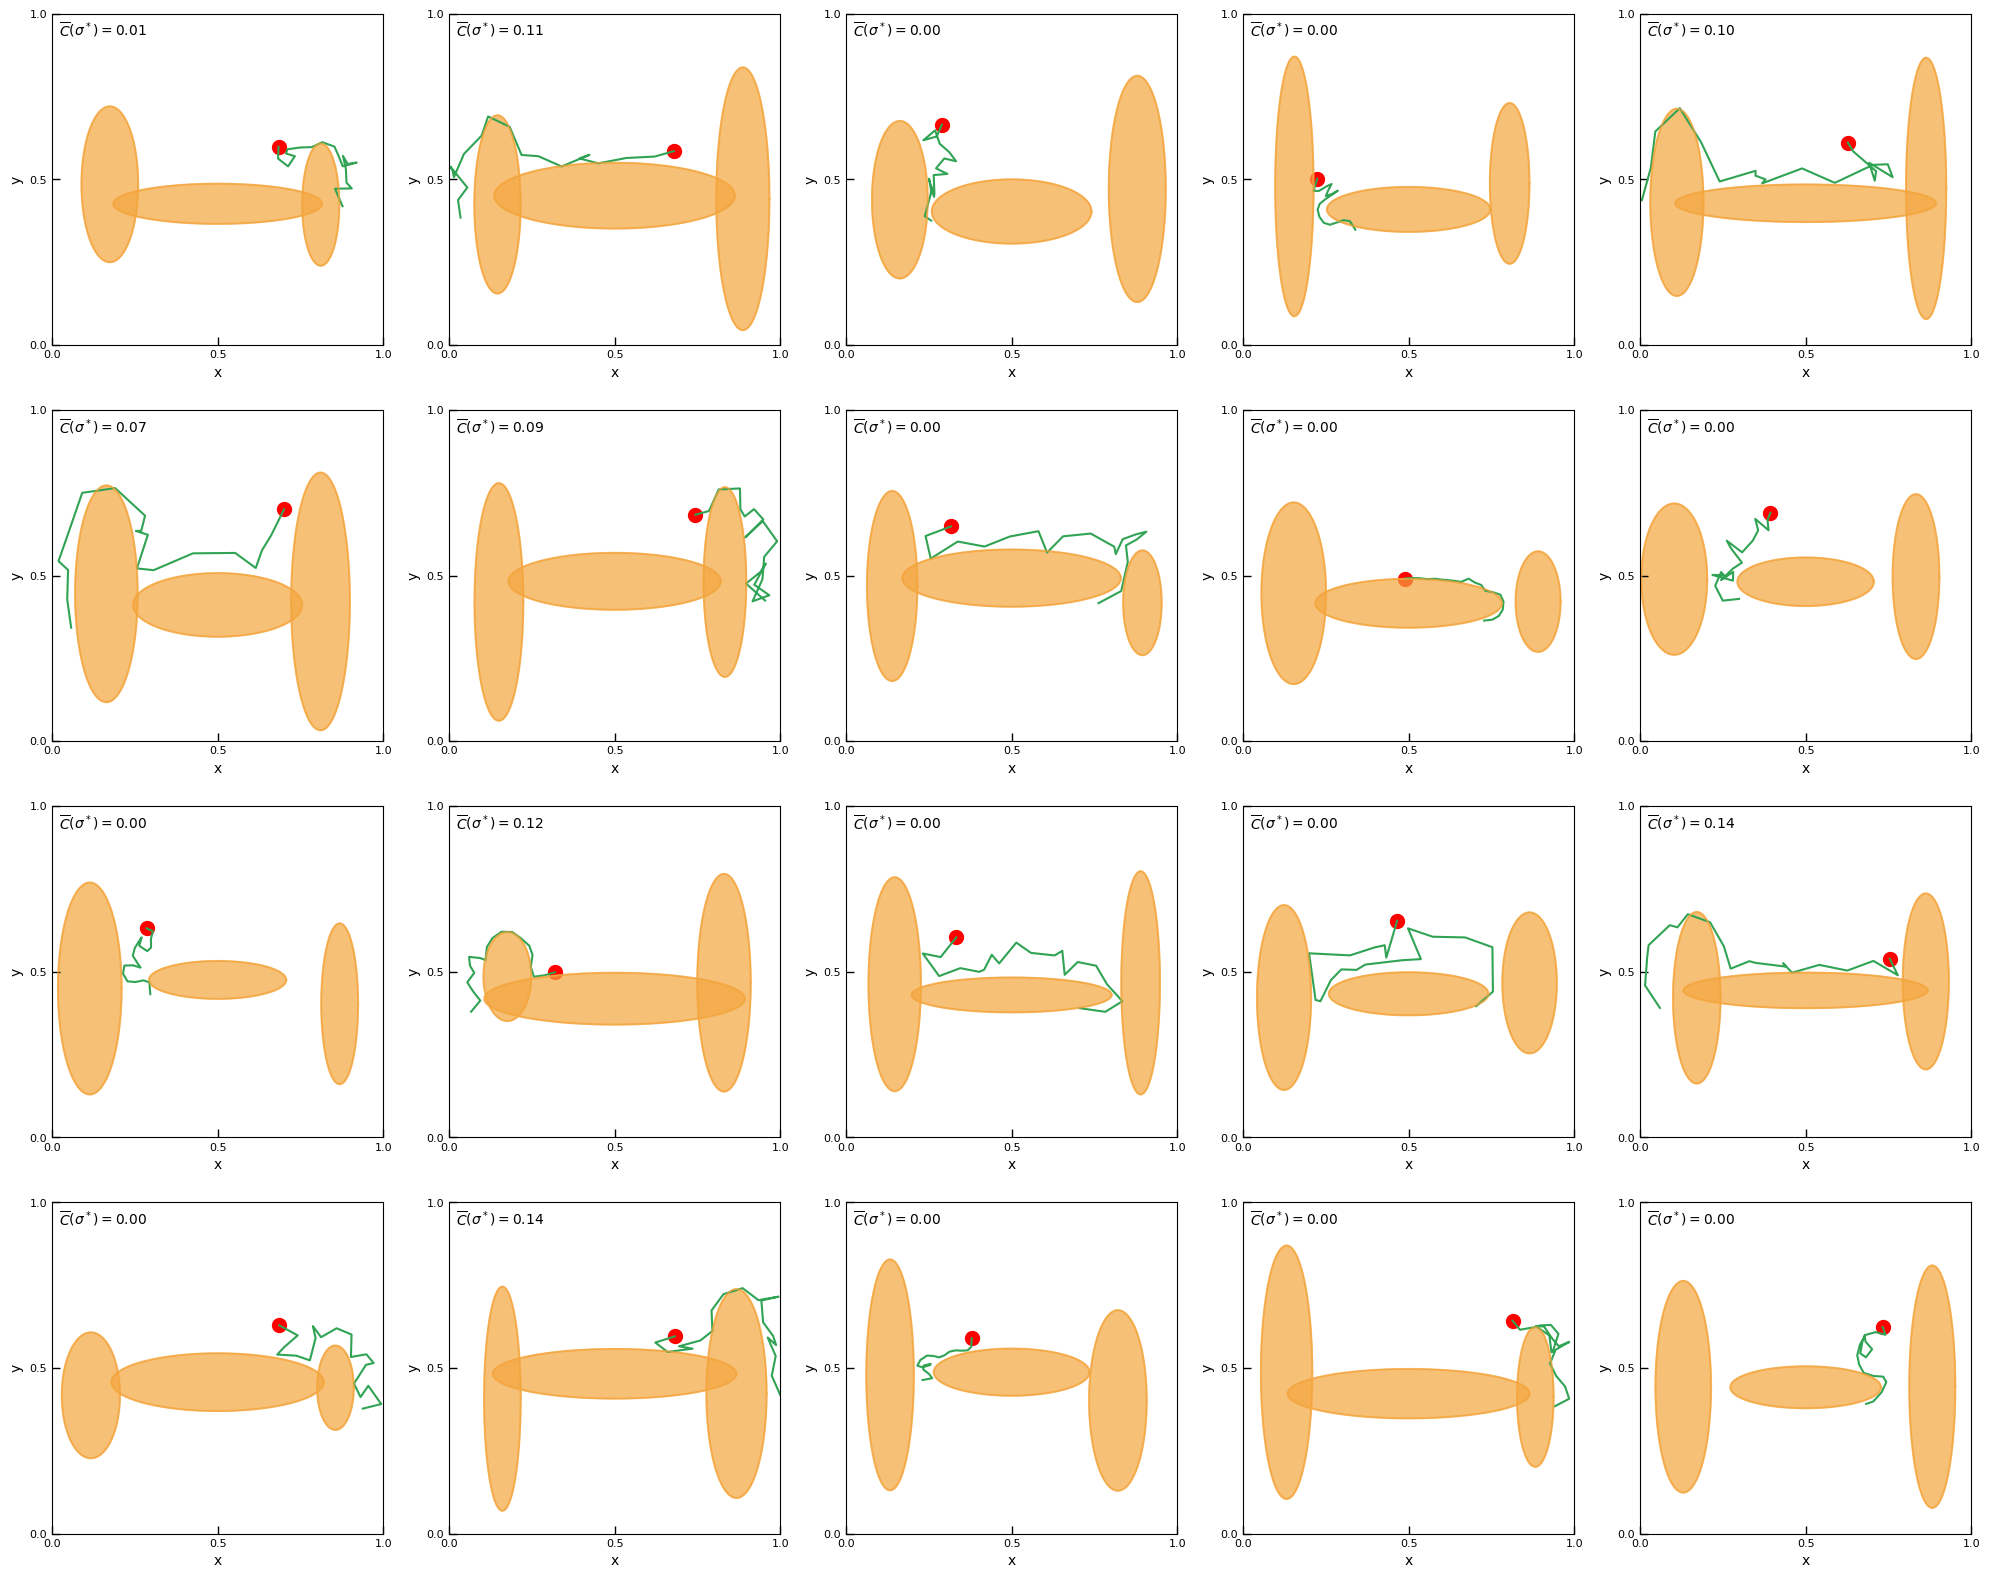

In [13]:
from dataset.escape_from_u_generator import plot_multiple
trn_data = joblib.load("../dataset_escape_from_u_2d_30000_envs.joblib")
num_envs = 20
sol_path_list = []
cost_list = []
centers_list = []
rads_list = []
for env_idx in range(num_envs):
    sol_path_list.append(trn_data["paths"][env_idx])
    cost_list.append(trn_data["costs"][env_idx])
    centers_list.append(trn_data["ellipse_centers"][env_idx])
    rads_list.append(trn_data["ellipse_radii"][env_idx])

plot_multiple(sol_path_list, cost_list, centers_list, rads_list)

In [26]:
for key, value in trn_data.items():
    print(f"{key}: {len(value)}")
print('costs', type(trn_data["costs"]))
print('costs', trn_data["costs"])
print('paths', trn_data["paths"])
print('object_starts', trn_data["object_starts"])


costs: 6
paths: 6
object_starts: 6
ellipse_centers: 6
ellipse_radii: 6
costs <class 'numpy.ndarray'>
costs [0.         0.00032877 0.         0.         0.         0.03209365]
paths [[[0.45580925 0.68537036]
  [0.41834608 0.62996103]
  [0.40587738 0.67183557]
  [0.45284282 0.61964025]
  [0.486888   0.60014907]
  [0.54439431 0.65190197]
  [0.60222496 0.67146199]
  [0.63987722 0.61895391]
  [0.65420421 0.6106548 ]
  [0.67334748 0.55435731]
  [0.70662757 0.58796657]
  [0.7679419  0.60811095]
  [0.74965366 0.65252623]
  [0.77285868 0.61885425]
  [0.7803659  0.598214  ]
  [0.7633884  0.55428415]
  [0.77043103 0.52532142]
  [0.79925971 0.49306505]
  [0.79429885 0.43389678]
  [0.75424768 0.43540488]]

 [[0.61691686 0.59070396]
  [0.62100338 0.53397404]
  [0.58773767 0.50142582]
  [0.6541713  0.52666671]
  [0.71135764 0.54752603]
  [0.69974045 0.5578557 ]
  [0.73802118 0.50268235]
  [0.71164017 0.46677389]
  [0.76657945 0.49902675]
  [0.73207873 0.44544288]
  [0.70091109 0.46776482]
  [0.761698